# Лабораторная работа 2
## Рекурсия. Стратегия «разделяй и властвуй»

In [2]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline


### **No 1**
(2 балла)
Реализуйте или найдите реализации двух сортировок: сортировка выбором и быстрая
сортировка. Проведите вычислительные эксперименты и нарисуйте графики,
показывающие зависимость времени выполнения двух алгоритмов от размера входных
данных. Рассмотрите три варианта входных данных:
1. Список случайных чисел
2. Отсортированный список
3. Отсортированный в обратную сторону список

Для каждого из вариантов должен быть свой график зависимости.

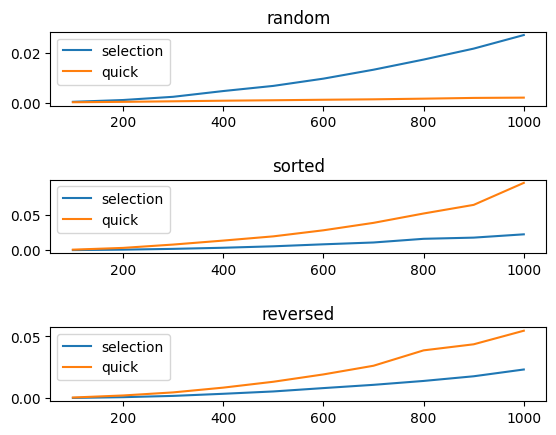

In [35]:

def selection_sort(data):
    for i, elem in enumerate(data):
        mn = min(range(i, len(data)), key=data.__getitem__)
        data[i], data[mn] = data[mn], elem
    return data


def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1


def quicksort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
        quicksort(array, low, pi - 1)
        quicksort(array, pi + 1, high)


time1 = timeit.Timer("selection_sort(test_list)", globals=globals())
time2 = timeit.Timer(
    "quicksort(test_list2, 0, len(test_list2) - 1)", globals=globals())

plt_x = []
plt_time1 = [[], [], []]
plt_time2 = [[], [], []]


for i in range(100, 1001, 100):
    plt_x.append(i)

    #random_list = list(np.random.randint(-i, i, i))
    #sorted_list = list(range(i))
    #unsorted_list = list(range(i, -1, -1))

    # random
    test_list = list(np.random.randint(-i, i, i))
    t = time1.timeit(number=1)
    plt_time1[0].append(t)

    test_list2 = list(np.random.randint(-i, i, i))
    t = time2.timeit(number=1)
    plt_time2[0].append(t)

    # sorted
    test_list = list(range(i))
    t = time1.timeit(number=1)
    plt_time1[1].append(t)

    test_list2 = list(range(i))
    t = time2.timeit(number=1)
    plt_time2[1].append(t)

    # unsorted
    test_list = list(range(i, -1, -1))
    t = time1.timeit(number=1)
    plt_time1[2].append(t)

    test_list2 = list(range(i, -1, -1))
    t = time2.timeit(number=1)
    plt_time2[2].append(t)


plt.subplot(311)
plt.plot(plt_x, plt_time1[0], label="selection")
plt.plot(plt_x, plt_time2[0], label="quick")
plt.title("random")
plt.legend()

plt.subplot(312)
plt.plot(plt_x, plt_time1[1], label="selection")
plt.plot(plt_x, plt_time2[1], label="quick")
plt.title("sorted")
plt.legend()

plt.subplot(313)
plt.plot(plt_x, plt_time1[2], label="selection")
plt.plot(plt_x, plt_time2[2], label="quick")
plt.title("reversed")
plt.legend()

plt.subplots_adjust(hspace=1)

plt.show()


### **No 2**
(2 балла)
Ряд Трибоначчи начинается с тройки 0, 0, 1, а каждое следующее число равно сумме
трёх предыдущих. Числа нумеруются с 0. Напишите функцию tribonacci(n), которая
принимает в себя номер числа и возвращает n-ое число Трибоначчи. Функция должна быть
рекурсивной. При решении данной задачи не используйте циклы.
Укажите базовый и рекурсивный случаи вашего алгоритма.

In [42]:
def tribonacci(n):
    if n == 0 or n == 1:
        return 0

    elif n == 2:
        return 1

    return tribonacci(n - 1) + tribonacci(n - 2) + tribonacci(n - 3)


for n in range(10):
    print(f"{n}. Trib = {tribonacci(n)}")


0. Trib = 0
1. Trib = 0
2. Trib = 1
3. Trib = 1
4. Trib = 2
5. Trib = 4
6. Trib = 7
7. Trib = 13
8. Trib = 24
9. Trib = 44


### **No 3**
(2 балла)
Хорошим примером для иллюстрации рекурсивных алгоритмов являются задачи
рисования фракталов. Далее представлена программа, которая при помощи модуля turtle рисует фрактальное дерево.

In [31]:
import turtle


def tree(branchLen, t):
    if branchLen > 5:
        t.forward(branchLen)
        t.right(20)
        tree(branchLen - 15, t)
        t.left(40)
        tree(branchLen - 15, t)
        t.right(20)
        t.backward(branchLen)


def main():
    t = turtle.Turtle()
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("green")
    tree(75, t)
    myWin.exitonclick()


main()


![zero](img/0.PNG)

Последовательно измените программу для рисования рекурсивного дерева по следующим пунктам:

1. Измените толщину ветвей, чтобы при уменьшении branchLen линии становились тоньше.

In [ ]:
import turtle


def tree(branchLen, t, width):
    if branchLen > 5:
        t.width(width)
        t.forward(branchLen)
        t.right(20)
        tree(branchLen - 15, t, width - 1)
        t.left(40)
        tree(branchLen - 15, t, width - 1)
        t.right(20)
        t.backward(branchLen)


def main():
    t = turtle.Turtle()
    t.speed(0)
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("green")
    tree(75, t, 5)
    myWin.exitonclick()


main()


![first](img/1.PNG)

2. Измените цвет ветвей таким образом, чтобы самые короткие ветви окрашивались как листья

In [33]:
import turtle


def tree(branchLen, t, width):
    if branchLen > 5:
        if width == 1:
            t.color("green")
        t.width(width)
        t.forward(branchLen)
        t.right(20)
        tree(branchLen - 15, t, width - 1)
        t.left(40)
        tree(branchLen - 15, t, width - 1)
        t.right(20)
        t.backward(branchLen)
        t.color("brown")


def main():
    t = turtle.Turtle()
    t.speed(0)
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("brown")
    tree(75, t, 5)
    myWin.exitonclick()


main()


![second](img/2.PNG)

3. Измените угол поворота черепахи, чтобы каждая ветвь поворачивалась
произвольным образом в некотором диапазоне. Например, выбирайте угол между
15-ю и 45-ю градусами. Поэкспрериментируйте в поисках лучшего вида.

In [11]:
import turtle


def tree(branchLen, t, width):
    if branchLen > 5:

        if width == 1:
            t.color("green")

        angle = np.random.randint(15, 45)

        t.width(width)
        t.forward(branchLen)
        t.right(angle)
        tree(branchLen - 15, t, width - 1)
        t.left(angle * 2)
        tree(branchLen - 15, t, width - 1)
        t.right(angle)
        t.backward(branchLen)
        t.color("brown")


def main():
    t = turtle.Turtle()
    t.speed(0)
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("brown")
    tree(80, t, 5)
    myWin.exitonclick()


main()


![three](img/3.PNG) ![three](img/3_1.PNG)

4. Измените рекурсивную часть branchLen, чтобы каждый раз вычиталось
произвольное значение из некоторого диапазона вместо некой постоянной
величины.

In [15]:
import turtle


def tree(branchLen, t, width):
    if branchLen > 5 and width > 0:

        if width == 1:
            t.color("green")
        angle = np.random.randint(15, 45)
        rand_len = np.random.randint(5, 20)
        t.width(width)
        t.forward(branchLen)

        t.right(angle)
        tree(branchLen - rand_len, t, width - 1)
        t.left(angle * 2)
        tree(branchLen - rand_len, t, width - 1)
        t.right(angle)
        t.backward(branchLen)
        t.color("brown")


def main():
    t = turtle.Turtle()
    t.speed(0)
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("brown")
    tree(80, t, 5)
    myWin.exitonclick()


main()


![four](img/4.PNG) ![four_1](img/4_1.PNG)

### **No 4**
При помощи модуля turtle нарисуйте фрактал, указанный в вашем варианте
#### Вариант 2. Снежинка Коха

In [38]:
import turtle


def koch_curve(size, n, t: turtle):
    if n == 0:
        t.forward(size)
    else:
        koch_curve(size / 3, n - 1, t)
        t.left(60)
        koch_curve(size / 3, n - 1, t)
        t.right(120)
        koch_curve(size / 3, n - 1, t)
        t.left(60)
        koch_curve(size / 3, n - 1, t)


def main(size, n):
    t = turtle.Turtle()
    t.speed(0)
    myWin = turtle.Screen()

    t.up()
    t.backward(size / 2)
    t.down()

    for i in range(3):
        koch_curve(size, n, t)
        t.right(120)

    myWin.exitonclick()


main(200, 3)


size = 200, n = 1
![201](img/num4_201.PNG)

size = 200, n = 2
![202](img/num4_202.PNG)

size = 200, n = 3
![203](img/num4_203.PNG)